<a href="https://colab.research.google.com/github/vishilp/dsbmed205/blob/main/PS4/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Q1.data', sep='\t')
data.head()

,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,...,snp_1991,snp_1992,snp_1993,snp_1994,snp_1995,snp_1996,snp_1997,snp_1998,snp_1999,phenotype
0,0,2,2,2,2,1,2,1,2,2,...,2,0,2,0,1,1,1,0,1,1
1,0,1,1,2,1,2,1,2,2,2,...,2,1,2,1,2,2,0,1,2,1
2,0,2,2,1,2,2,0,2,2,1,...,1,1,2,1,0,2,1,1,0,1
3,1,1,1,2,1,1,2,2,2,2,...,2,0,2,1,1,2,0,1,0,1
4,0,2,1,1,2,1,1,2,2,2,...,1,0,1,2,1,1,1,0,1,1


In [30]:
Y = data['phenotype']
X = data.drop('phenotype', axis=1)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
pvals= []
siglevel = 0.05/2000
count = 0 #track how many significant p values
for i in range(X.shape[1]):
  snp = X.iloc[:, i]
  snp = sm.add_constant(snp)  # add intercept
  model = sm.OLS(Y, snp).fit()
  p_value = model.pvalues[1]  # p-value for SNP (not intercept)
  pvals.append(p_value)
  if p_value < siglevel:
    count += 1
pvals = np.array(pvals)

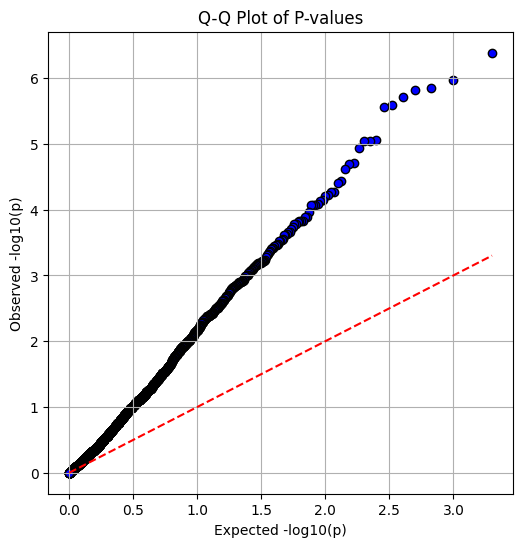

In [33]:
# Sort observed p-values
# Sort the observed p-values
observed_p = np.sort(pvals)

# Expected p-values under uniform distribution
expected_p = np.linspace(1/len(pvals), 1, len(pvals))

# Q-Q Plot
plt.figure(figsize=(6, 6))
plt.scatter(-np.log10(expected_p), -np.log10(observed_p), color='blue', edgecolor='k')
plt.plot([0, -np.log10(min(expected_p))], [0, -np.log10(min(expected_p))], color='red', linestyle='--')  # y = x line
plt.xlabel('Expected -log10(p)')
plt.ylabel('Observed -log10(p)')
plt.title('Q-Q Plot of P-values')
plt.grid(True)
plt.show()

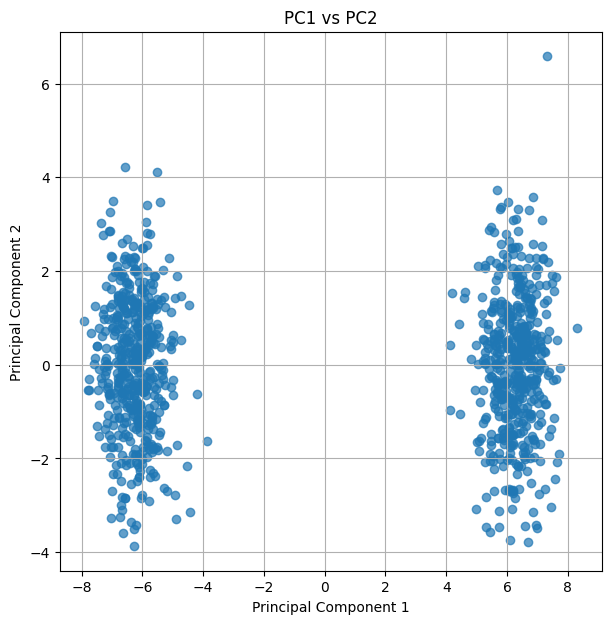

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaresults = pca.fit_transform(data)

# --- Plot the first 2 PCs ---
plt.figure(figsize=(7, 7))
plt.scatter(pcaresults[:, 0], pcaresults[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=1)
PC1 = pca.fit_transform(data)
#include PC1 in regression model to see see how much of phenotype is influenced by SNP while accounting for variation in phenotype due to ancestry/cluster

p_values_adjusted = []
count2=0

for i in range(X.shape[1]):
    snp = X.iloc[:, i]

    # Design matrix: SNP + PC1 (add constant for intercept)
    X_design = np.column_stack((snp, PC1))
    X_design = sm.add_constant(X_design)

    # Run linear regression
    model = sm.OLS(Y, X_design)
    results = model.fit()

    # p-value for SNP (usually first coefficient after intercept)
    p_value = results.pvalues[1]  # Index 1: SNP's p-value
    p_values_adjusted.append(p_value)
    if p_value < siglevel:
      count2 += 1

p_values_adjusted = np.array(p_values_adjusted)

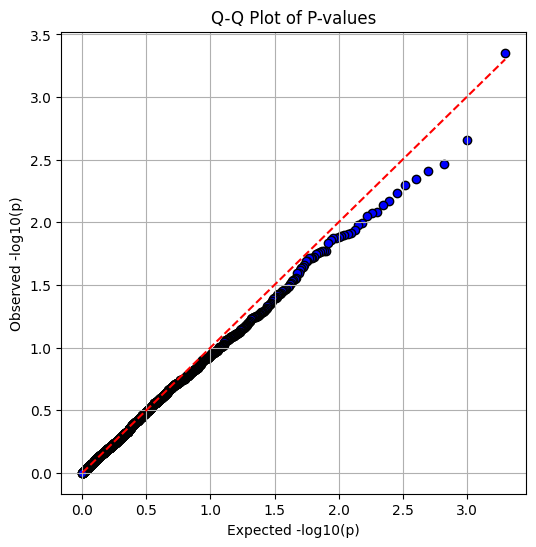

In [36]:
# Sort the observed p-values
observed_p = np.sort(p_values_adjusted)

# Expected p-values under uniform distribution
expected_p = np.linspace(1/len(p_values_adjusted), 1, len(p_values_adjusted))

# Q-Q Plot
plt.figure(figsize=(6, 6))
plt.scatter(-np.log10(expected_p), -np.log10(observed_p), color='blue', edgecolor='k')
plt.plot([0, -np.log10(min(expected_p))], [0, -np.log10(min(expected_p))], color='red', linestyle='--')  # y = x line
plt.xlabel('Expected -log10(p)')
plt.ylabel('Observed -log10(p)')
plt.title('Q-Q Plot of P-values')
plt.grid(True)
plt.show()

In [37]:
data2 = pd.read_csv('/content/Q2.data', header=None, sep=' ')
data2.head()

,0,1,2
0,1.000000,0.977273,1
1,0.000000,0.000000,1
2,0.970588,0.903409,1
3,0.000000,0.125000,1
4,0.176471,0.164773,1


In [38]:
data2.shape #1614 SNP rows, 3 population columns, each cell is frequency of allele 1 at a snp based on population

(1614, 3)

In [39]:
# Extract columns
X5 = data2[0]  # Column for europeans
X4 = data2[1]  # Column for africans
X3 = data2[2]  # Column for asians

# Number of SNPs
m = data2.shape[0]

# Compute d_hat
d_hat = np.dot(X5 - X4, X3)/ m
d_hat

0.010758888178438659

In [40]:
import scipy.stats as st
z_score = d_hat / 0.004
print(f"Z-score: {z_score}")
p_value = 2 * (1 - st.norm.cdf(abs(z_score)))
print(f"P-value: {p_value}")

Z-score: 2.6897220446096646
P-value: 0.007151155487317151
